# Exercise 1

In [17]:
library('lubridate')
library('reshape2')
library('tidyverse')
library('ggplot2')
library('latex2exp')
library("gridExtra")
library(purrr)
library('latex2exp')

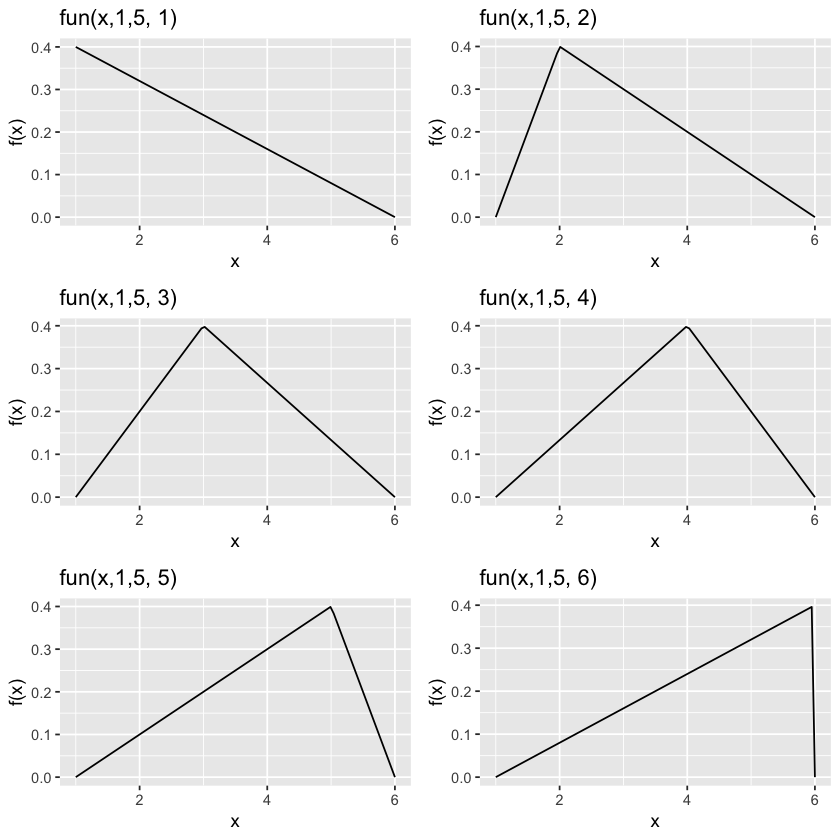

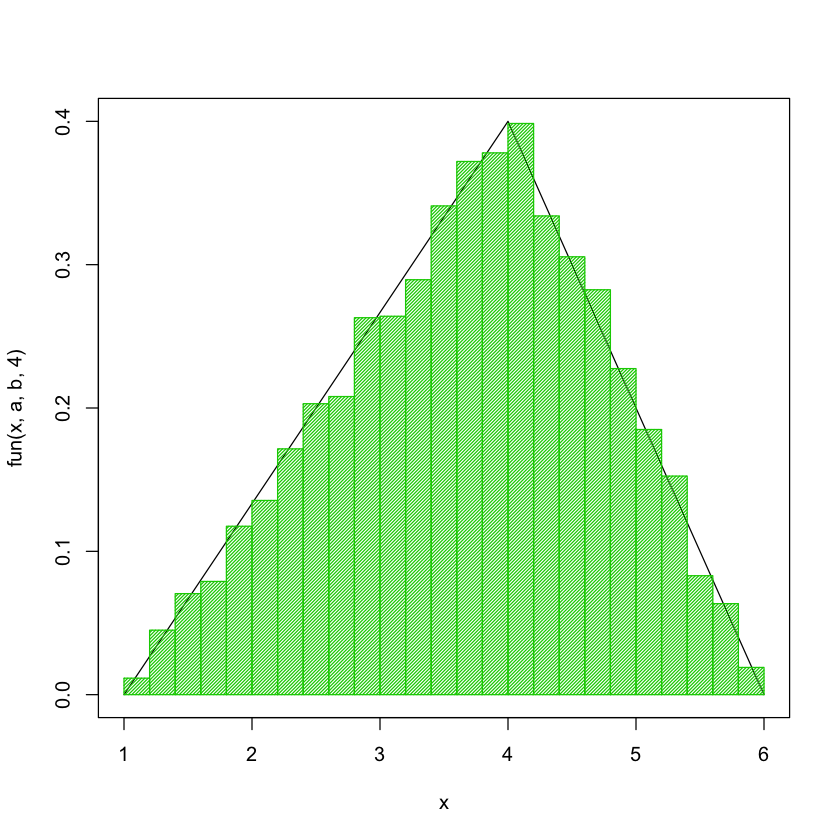

In [18]:
fun <- function(x,a,b,c) {
    q <- ifelse (x >= a & x<c, 
                2*(x-a)/((b-a)*(c-a)),
                ifelse ( x >= c & x<b,
                        2*(b-x)/((b-a)*(b-c)),
                        0
                )
                )
}

I = c(1,6)
c <- 4
a <- I[[1]]
b <- I[[2]]


x <- seq(a,b, length.out=100)


plot <- lapply(1:6, function(c) ggplot() + geom_line(aes(x = x, y = fun(x,a,b,c))) + 
    labs(title=sprintf("fun(x,1,5, %.f)", c),  x='x', y='f(x)'))
require(gridExtra)
do.call(grid.arrange,  plot)

fun2 <-function (n,a,b,c) {
    u <- runif(n)
    cdf <- function(x) {integrate(fun, a, x, a=a, b=b, c=c)$value}
    F.inv <- Vectorize(function(y){uniroot(function(x){cdf(x)-y}, lower=a, upper=b, extendInt='yes', tol=0.0001)$root})
    return(F.inv(u))
}



curve(fun(x,a,b,4),1,6)
hist(fun2(10000, 1,6,4), prob=TRUE, add=TRUE, density=50, col=3, breaks=20)


# Exercise 2

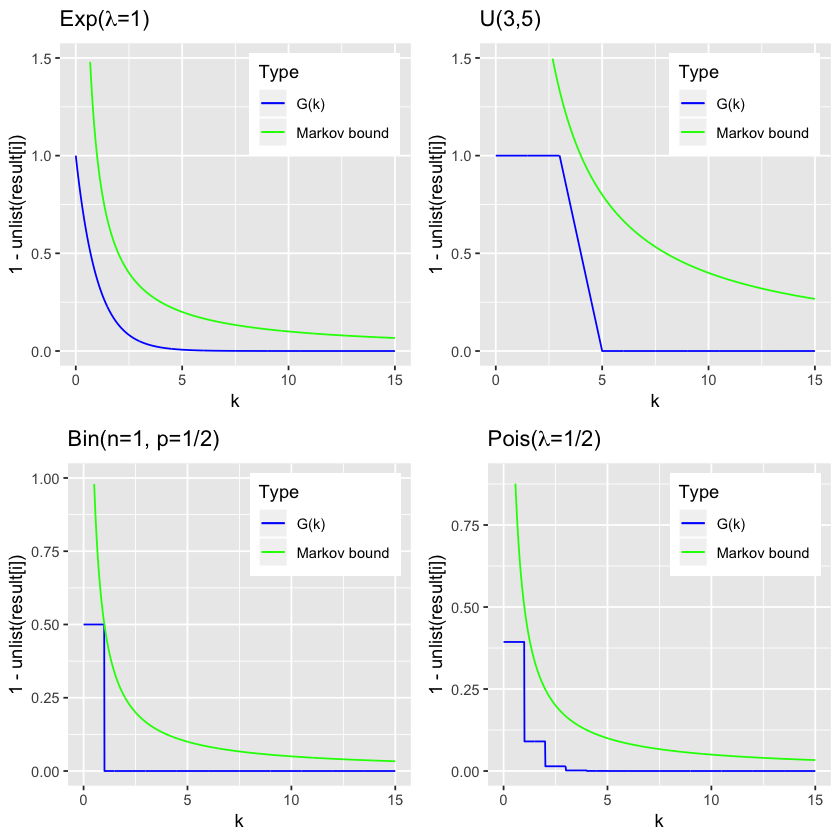

In [19]:
dist1 <- c(pexp, punif, pbinom, ppois)
param <- list(list(rate=1), 
           list(min=3, max=5), 
           list(size=1, prob=1/2),
           list(lambda=1/2)
          )

mean<-c(1,4,1/2,1/2)
title<-c(TeX('Exp($\\lambda$=1)'), 'U(3,5)', 
         'Bin(n=1, p=1/2)', TeX('Pois($\\lambda$=1/2)'))

x <- seq(0, 15, len=1000)
result <- invoke_map(dist1, param, x)

plots = lapply(1:4, function(i) ggplot() + geom_line(aes(x = x, y = 1-unlist(result[i]), color='G(k)')) + 
    labs(colour="Type", title=title[i],  x='k') + 
    geom_line(aes(x = x, y = mean[i]/x, color='Markov bound'))  + 
   scale_colour_manual(values=c("blue", "green")) +
    ylim(0, max(1-unlist(result[i]))+0.5) +
    theme(
    legend.position = c(0.97, 0.97),
    legend.justification = c("right", "top")))

require(gridExtra)
do.call(grid.arrange, plots)

# Exercise 3

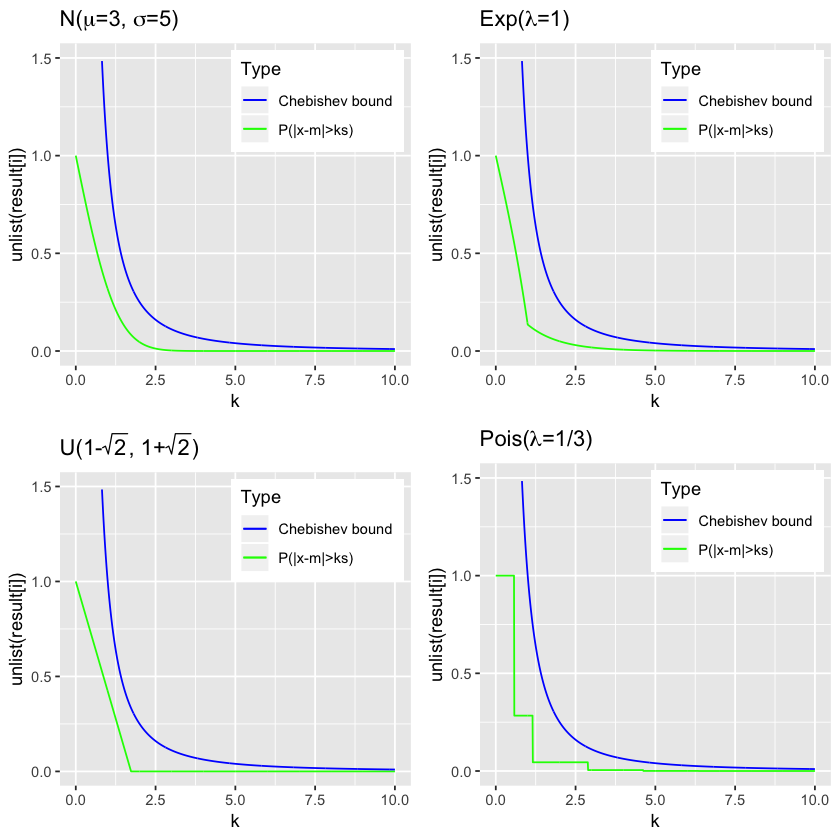

In [20]:
dist2 <- function(x, f, mu, sigma, ...) {
    p <- 1-f(mu+x*sigma, ...)+f(mu-x*sigma, ...)
    return(p)
}

dist1 <- c(dist2)
x <- seq(0,10,len=1000)
param <- list(list(f=pnorm, mu=3, sigma=5, mean=3, sd=5),
              list(f=pexp, mu=1, sigma=1, rate=1),
              list(f=punif, mu=1, sigma=2*sqrt(2/12), min=1-sqrt(2), max=1+sqrt(2)),
              list(f=ppois, mu=1/3, sigma=sqrt(1/3), lambda=1/3)
              )
title<-c(TeX('N($\\mu$=3, $\\sigma$=5)'), 
         TeX('Exp($\\lambda$=1)'), 
         TeX('U(1-$\\sqrt{2}$, 1+$\\sqrt{2}$)'), 
         TeX('Pois($\\lambda$=1/3)'))
result <- invoke_map(dist2, param, x)

plots = lapply(1:4, function(i) ggplot() + geom_line(aes(x = x, y = unlist(result[i]), 
       color=('P(|x-m|>ks)'))) + 
    labs(colour="Type", title=title[i],  x='k') + 
    geom_line(aes(x = x, y = 1/x^2, color='Chebishev bound'))  + 
   scale_colour_manual(values=c("blue", "green")) +
    ylim(0, max(unlist(result[i]))+0.5) +
    theme(
    legend.position = c(0.98, 0.98),
    legend.justification = c("right", "top")))

require(gridExtra)
do.call(grid.arrange,  plots)

# Exercise 4

Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): W
Extracted color(B, W or Stop): W
Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): B
Extracted color(B, W or Stop): Stop


h0,h1,h2,h3,h4,h5,x,color
0.1666667,0.1666667,0.16666667,0.166666667,1.666667e-01,0.1666667,1,start
0.3333333,0.2666667,0.20000000,0.133333333,6.666667e-02,0.0000000,2,B
0.4545455,0.2909091,0.16363636,0.072727273,1.818182e-02,0.0000000,3,B
0.5555556,0.2844444,0.12000000,0.035555556,4.444444e-03,0.0000000,4,B
0.6384065,0.2614913,0.08273749,0.016343207,1.021450e-03,0.0000000,5,B
0.7062147,0.2314124,0.05491525,0.007231638,2.259887e-04,0.0000000,6,B
0.7616378,0.1996588,0.03553497,0.003119669,4.874482e-05,0.0000000,7,B
0.0000000,0.7123478,0.25356522,0.033391304,6.956522e-04,0.0000000,8,W
0.0000000,0.5386639,0.38348238,0.075749605,2.104156e-03,0.0000000,9,W
0.0000000,0.6229658,0.33262357,0.043802281,6.083650e-04,0.0000000,10,B


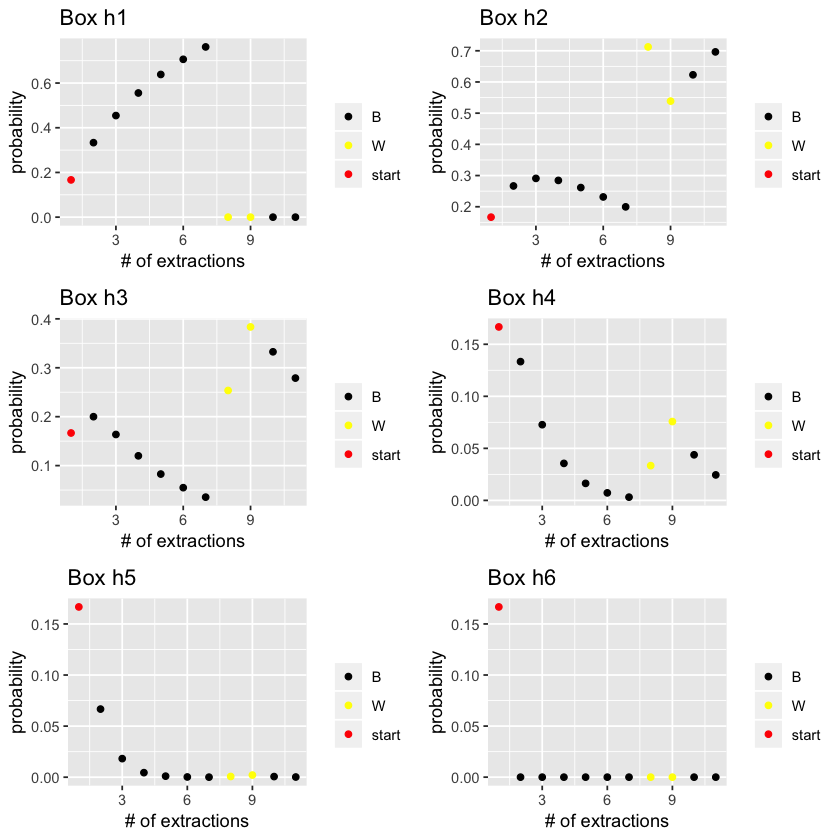

In [26]:
#White color is going to be represted with yellow for better clarity in the graphs

new <- function(k, j, c){
    p <- ifelse(c=='B', k*(5-j)/5, k*j/5)
    return(p)
  }

colors<- c('start')
df <- data.frame('h0'=1/6, 'h1'=1/6, 'h2'=1/6, 'h3'=1/6, 'h4'=1/6, 'h5'=1/6)

while((color <- readline("Extracted color(B, W or Stop): "))!='Stop') {
    
    v <-as.vector(unlist(mapply(new, 0:5, c=color, k=tail(df, 1))))
    norm <- sum(v)
    df <- (rbind(df, v/norm))
    colors <- append(colors, color)
}
    
df$x <- rownames(df)
df$color <- colors
df
df$x <- as.numeric(as.character(df$x))
sample <- df$x  

plots = lapply(1:6, function(i) ggplot() + geom_point(aes(x = sample, y = df[, i],  colour=df$color)) + 
   scale_colour_manual(values = c('start'="red", 'B'="black", 'W'="yellow")) +
   labs(colour='',title=sprintf('Box h%.f', i),  x='# of extractions', y='probability')) 

do.call(grid.arrange,  plots)  

# Exercise 5

Select a box number between 0 and 5: 4


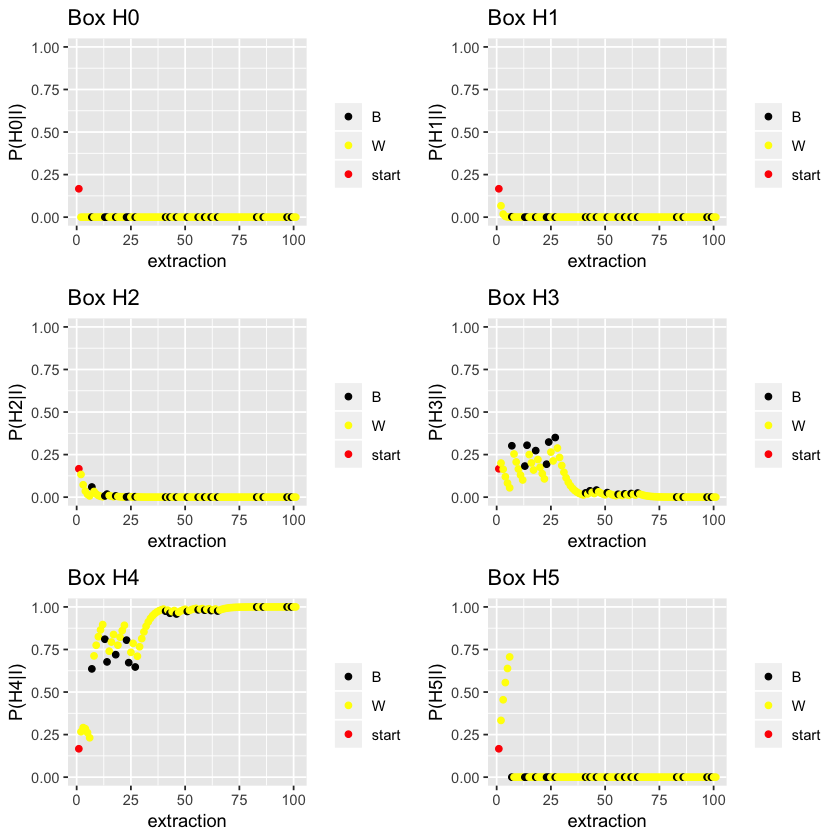

In [31]:
#White color is going to be represted with yellow for better clarity in the graphs

Iteration <- 100

index <- as.integer(readline('Select a box number between 0 and 5: '))
colour <- c('B', 'W')
x <- sample(colour, size=Iteration, replace=TRUE, prob=c((5-index)/5, index/5))

df <- data.frame('h0'=1/6, 'h1'=1/6, 'h2'=1/6, 'h3'=1/6, 'h4'=1/6, 'h5'=1/6)
for (c in x) { 
    v <-as.vector(unlist(mapply(new, 0:5, c=c, k=tail(df, 1))))
    
    norm <- sum(v)
    df <- (rbind(df, v/norm))
    
}

x <- append(x, 'start', 0)
df$color <- x
df$x <- rownames(df)
df$x <- as.numeric(as.character(df$x))

sample <- df$x  
plots = lapply(1:6, function(index) ggplot() + geom_point(aes(x = sample, y = df[, index], colour=df$color))+ 
        scale_colour_manual(values = c('start'="red", 'B'="black", 'W'="yellow")) +
        ylim(0, 1) + 
   labs(colour='',title=sprintf('Box H%.f', index-1),  x='extraction', y=sprintf('P(H%.f|I)', index-1)))

do.call(grid.arrange,  plots)